In [1]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [8]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

x, y = Variable(x), Variable(y)

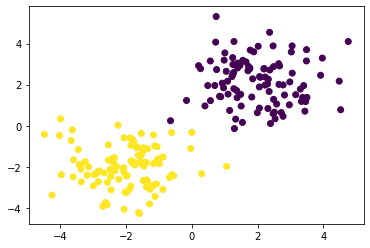

In [9]:
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c = y.data.numpy())
plt.show()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 包含的层
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        # 层连接
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x 

In [10]:
net = Net(2, 10, 2)
net

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)

In [11]:

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(1000):
    prediction = net(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%50 == 0:
        print('loss:', loss)  

loss: tensor(1.0838, grad_fn=<NllLossBackward>)
loss: tensor(0.1689, grad_fn=<NllLossBackward>)
loss: tensor(0.0815, grad_fn=<NllLossBackward>)
loss: tensor(0.0541, grad_fn=<NllLossBackward>)
loss: tensor(0.0413, grad_fn=<NllLossBackward>)
loss: tensor(0.0339, grad_fn=<NllLossBackward>)
loss: tensor(0.0292, grad_fn=<NllLossBackward>)
loss: tensor(0.0258, grad_fn=<NllLossBackward>)
loss: tensor(0.0233, grad_fn=<NllLossBackward>)
loss: tensor(0.0214, grad_fn=<NllLossBackward>)
loss: tensor(0.0199, grad_fn=<NllLossBackward>)
loss: tensor(0.0186, grad_fn=<NllLossBackward>)
loss: tensor(0.0176, grad_fn=<NllLossBackward>)
loss: tensor(0.0167, grad_fn=<NllLossBackward>)
loss: tensor(0.0159, grad_fn=<NllLossBackward>)
loss: tensor(0.0152, grad_fn=<NllLossBackward>)
loss: tensor(0.0147, grad_fn=<NllLossBackward>)
loss: tensor(0.0141, grad_fn=<NllLossBackward>)
loss: tensor(0.0137, grad_fn=<NllLossBackward>)
loss: tensor(0.0133, grad_fn=<NllLossBackward>)


/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/1env2/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


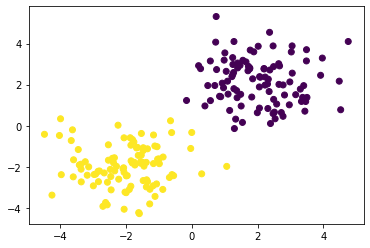

In [20]:
import torch.nn.functional as F

prediction = net(x)
pre = F.softmax(prediction)
xs = torch.max(pre, 1)
xs[1]

plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c = xs[1].data.numpy())
plt.show()